<a href="https://colab.research.google.com/github/tgalkovskyi/FALdetector/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/peterwang512/FALdetector
!apt install -q tree
!tree -d

%cd FALdetector
!bash weights/download_weights.sh

Cloning into 'FALdetector'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 97 (delta 32), reused 75 (delta 19), pack-reused 0
Unpacking objects: 100% (97/97), done.
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (1,099 kB/s)
Selecting previously unselected package tree.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
.
├── FALdetector
│   ├─

In [0]:
# examples/original.jpg
# examples/modified.jpg
# https://thispersondoesnotexist.com/image
# Result photo from a tutorial showcasing use of Photoshop tool: http://jeeskdenny.com/blog/face-aware-liquify-meet-new-addition-photoshop-cc-2017/
#  http://jeeskdenny.com/blog/wp-content/uploads/2017/01/sample-after.jpg
filename = "examples/modified.jpg"  #@param {type:"string"}
if filename.startswith('http'):
  temp_file = filename[filename.rfind("/")+1:]
  !wget "$filename" --user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10.8; rv:21.0) Gecko/20100101 Firefox/21.0" -O $temp_file
  filename = temp_file


In [24]:
!python global_classifier.py --input_path $filename --model_path weights/global.pth

Probibility being modified by Photoshop FAL: 98.00%


cropped_input.jpg  heatmap.jpg	warped.jpg


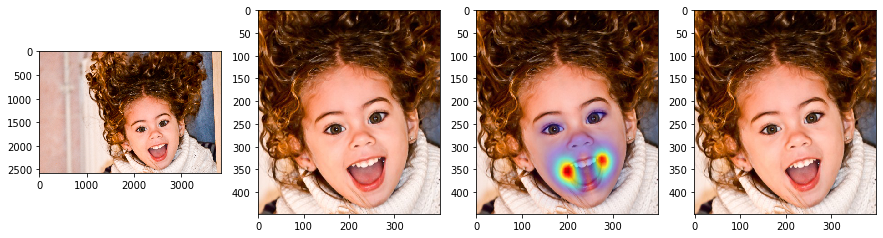

In [25]:
# Now computing heatmap and suggested reversal of the manipulation.
!python local_detector.py --input_path $filename --model_path weights/local.pth --dest_folder out/

# Confirming output is there:
!ls out

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8
fig, ax = plt.subplots(1,4)
ax[0].imshow(mpimg.imread(filename))
ax[1].imshow(mpimg.imread('out/cropped_input.jpg'))
ax[2].imshow(mpimg.imread('out/heatmap.jpg'))
# out/warped.jpg is suggested modification to "undo" predicted manipulation
ax[3].imshow(mpimg.imread('out/warped.jpg'))